# GPA-5 Prediction for SSC exam in Bangladesh 

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Importing dataset
df = pd.read_csv('gpa5.csv')

In [3]:
df

,year,students
0,2001,76
1,2002,327
2,2003,1389
3,2004,8597
4,2005,15631
5,2006,24384
6,2007,25732
7,2008,41917
8,2009,45934
9,2010,52134


In [4]:
#Shape of the datset
df.shape

(22, 2)

In [5]:
#Null Value Checking
df.isnull().sum()

year        0
students    0
dtype: int64

Text(0, 0.5, 'No. of Students got GPA-5')

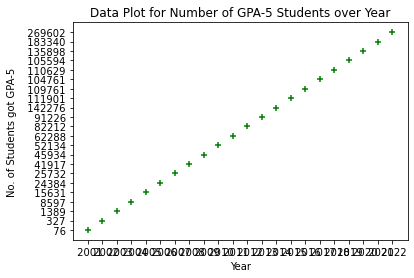

In [6]:
#Scatter Plot
plt.scatter(df['year'], df['students'], marker = '+', color = 'green')
plt.title('Data Plot for Number of GPA-5 Students over Year')
plt.xlabel('Year')
plt.ylabel('No. of Students got GPA-5')

# Dividing the Dataset into Feature and labels

In [7]:
x = df[['year']]
y = df[['students']]

# Splitting the Dataset into Train and Testing

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state = 1)

# Model Developing using Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [37]:
lr.predict(xtest)

array([[176158.02988306],
       [144010.66944565],
       [  4705.4408835 ],
       [111863.30900823],
       [165442.24307059],
       [133294.88263317],
       [ 79715.94857081]])

In [38]:
lr.predict([[2023]])

array([[208305.39032048]])

In [39]:
lr.score(xtest, ytest)

0.33617382781318683

# Model Developing using Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)

C:\Users\user\AppData\Local\Temp/ipykernel_6920/3889765417.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


RandomForestRegressor()

In [42]:
rfr.predict(xtest)

array([172634.45, 113316.61,   6090.42,  93104.34, 134824.73, 111828.29,
        58044.52])

In [43]:
rfr.score(xtest, ytest)

0.6328641302036349

# Model Developing using Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dtr = DecisionTreeRegressor()

In [46]:
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [47]:
dtr.predict(xtest)

array([183340., 110629.,   1389.,  91226., 110629., 111901.,  52134.])

In [48]:
dtr.score(xtest, ytest)

0.6054547632020688

# Model Developing using Gradient Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
gbr = GradientBoostingRegressor()

In [51]:
gbr.fit(xtrain, ytrain)

J:\ML\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor()

In [52]:
gbr.predict(xtest)

array([183336.17557251, 110630.43297346,   1391.2484858 ,  91225.30035193,
       110630.43297346, 111895.37983815,  52134.27320028])

In [53]:
gbr.score(xtest, ytest)

0.605479802296492

# Plot individual and voting regression predictions

# Making predictions

In [67]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([("lr", lr), ("rfr", rfr), ("dtr", dtr), ("gbr", gbr)])
vr.fit(xtrain, ytrain)

J:\ML\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rfr', RandomForestRegressor()),
                            ('dtr', DecisionTreeRegressor()),
                            ('gbr', GradientBoostingRegressor())])

In [69]:
pred1 = lr.predict(xtest)
pred2 = rfr.predict(xtest)
pred3 = dtr.predict(xtest)
pred4 = gbr.predict(xtest)
pred5 = vr.predict(xtest)

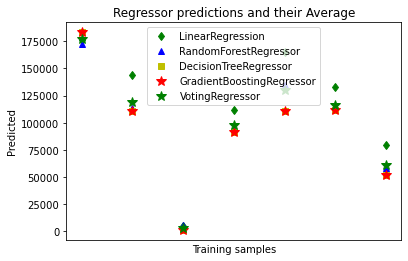

In [70]:
plt.figure()
plt.plot(pred1, "gd", label="LinearRegression")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="DecisionTreeRegressor")
plt.plot(pred4, "r*", ms=10, label="GradientBoostingRegressor")
plt.plot(pred5, "g*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("Training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their Average")

plt.show()

# Thank you Very Much